# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Rendy Pratama
- **Email:** rendypratama752@gmail.com
- **ID Dicoding:** shiruraizo

## Menentukan Pertanyaan Bisnis

*   Produk mana saja yang menyumbang pendapatan paling banyak dan paling sedikit bagi perusahaan?
*   Bagaimana tren jumlah kasus pengiriman pesanan yang melewati batas estimasi waktu tiap bulan nya pada tahun 2017?


## Import Semua Packages/Library yang Digunakan

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [81]:
customers_df = pd.read_csv("e_commerce/customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [82]:
geolocation_df = pd.read_csv("e_commerce/geolocation_dataset.csv")
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [83]:
order_items_df = pd.read_csv("e_commerce/order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [84]:
order_payments_df = pd.read_csv("e_commerce/order_payments_dataset.csv")
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [85]:
order_reviews_df = pd.read_csv("e_commerce/order_reviews_dataset.csv")
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [86]:
orders_df = pd.read_csv("e_commerce/orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [87]:
product_category_name_translation_df = pd.read_csv("e_commerce/product_category_name_translation.csv")
product_category_name_translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [88]:
products_df = pd.read_csv("e_commerce/products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [89]:
sellers_df = pd.read_csv("e_commerce/sellers_dataset.csv")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Assessing Data

In [90]:
# Customers
customers_df.info()
print(customers_df.isna().sum())
print("Jumlah duplikasi: ", customers_df.duplicated().sum())
customers_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64
Jumlah duplikasi:  0


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [91]:
# Geolocation
geolocation_df.info()
print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())
geolocation_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB
Jumlah duplikasi:  261831


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


**geolocation_df**

*   261831 duplikasi data



In [92]:
# Order Items
order_items_df.info()
print(order_items_df.isna().sum())
print("Jumlah duplikasi: ", order_items_df.duplicated().sum())
order_items_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64
Jumlah duplikasi:  0


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


**order_items_df**

*   Kesalahan tipe data pada kolom shipping_limit_date yang seharusnya datetime



In [93]:
# Order Payments
order_payments_df.info()
print(order_payments_df.isna().sum())
print("Jumlah duplikasi: ", order_payments_df.duplicated().sum())
order_payments_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64
Jumlah duplikasi:  0


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [94]:
# Order Reviews
order_reviews_df.info()
print(order_reviews_df.isna().sum())
print("Jumlah duplikasi: ", order_reviews_df.duplicated().sum())
order_reviews_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB
review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64
Jumlah duplikasi:  0


,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000




*   Kesalahan tipe data pada kolom review_creation_date dan review_answer_timestamp yang seharusnya datetime
*   87656 missing value pada kolom review_comment_title
*   58247 missing value pada kolom review_comment_message



In [95]:
# Orders
orders_df.info()
print(orders_df.isna().sum())
print("Jumlah duplikasi: ", orders_df.duplicated().sum())
orders_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522




*   Kesalahan tipe data pada kolom order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, dan order_estimated_delivery_date yang seharusnya datetime
*   160 missing value pada kolom order_approved_at
*   1783 missing value pada kolom order_delivered_carrier_date
*   2965 missing value pada kolom order_delivered_customer_date



In [96]:
# Product Category Name Translation
product_category_name_translation_df.info()
print(product_category_name_translation_df.isna().sum())
print("Jumlah duplikasi: ", product_category_name_translation_df.duplicated().sum())
product_category_name_translation_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB
product_category_name            0
product_category_name_english    0
dtype: int64
Jumlah duplikasi:  0


,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


In [97]:
# Products
products_df.info()
print(products_df.isna().sum())
print("Jumlah duplikasi: ", products_df.duplicated().sum())
products_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_l

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000




*   Kesalahan tipe data pada kolom product_name_lenght, product_description_lenght, dan product_photos_qty yang seharusnya int
*   610 missing value pada kolom product_category_name,  product_name_lenght, product_description_lenght, dan product_photos_qty
*   2 missing value pada kolom product_weight_g, product_length_cm, product_height_cm, dan product_width_cm



In [98]:
# Sellers
sellers_df.info()
print(sellers_df.isna().sum())
print("Jumlah duplikasi: ", sellers_df.duplicated().sum())
sellers_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64
Jumlah duplikasi:  0


,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


### Cleaning Data

In [99]:
# Cleaning geolocation_df
print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())
geolocation_df.drop_duplicates(inplace=True)
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

Jumlah duplikasi:  261831
Jumlah duplikasi:  0


Menghilangkan duplikasi data menggunakan drop_duplicates() method

In [100]:
# Cleaning order_items_df
order_items_df.info()
order_items_df["shipping_limit_date"] = pd.to_datetime(order_items_df["shipping_limit_date"])
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           1

 Mengganti tipe data pada kolom shipping_limit_date menjadi datetime.

In [101]:
# Cleaning order_reviews_df
order_reviews_df.info()

datetime_columns = ["review_creation_date", "review_answer_timestamp"]
for column in datetime_columns:
  order_reviews_df[column] = pd.to_datetime(order_reviews_df[column])

order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_s



*    Mengganti tipe data pada kolom review_creation_date dan review_answer_timestamp menjadi datetime.
*   Membiarkan data dengan kolom review_comment_title dan review_comment_message dengan nilai kosong selama masih memiliki nilai pada review_score yang memiliki fokus utama dalam memberi rating sementara komentar review bersifat opsional.



In [102]:
# Cleaning orders_df
orders_df.info()
datetime_columns = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]
for column in datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])

orders_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id       



*    Mengganti tipe data pada kolom "order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date" menjadi datetime.
*   Membiarkan data dengan kolom dengan nilai kosong seperti order_approved_at yang yang berarti pesanan belum disetujui, order_delivered_carrier_date yang berarti pesanan belum diangkut, dan order_delivered_customer_date yang berarti pesanan belum sampai ke pelanggan.



In [103]:
# Cleaning products_df
products_df[products_df.product_category_name.isna()]
products_df.dropna(subset=["product_category_name"], inplace=True)

products_df.info()
print(products_df.isna().sum())
columns_to_fill = ["product_weight_g", "product_length_cm", "product_height_cm", "product_width_cm"]
for column in columns_to_fill:
  products_df[column] = products_df[column].fillna(products_df[column].mean())

products_df.info()
int_columns = ["product_name_lenght", "product_description_lenght", "product_photos_qty"]
for column in int_columns:
  products_df[column] = products_df[column].fillna(0).astype(int)

products_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32341 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32341 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32340 non-null  float64
 6   product_length_cm           32340 non-null  float64
 7   product_height_cm           32340 non-null  float64
 8   product_width_cm            32340 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.5+ MB
product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              1
product_length_cm         



*   Menghapus semua baris data yang memiliki kolom product_category_name yang kosong karena tidak memiliki identitas ketegori nama produk yang jelas dan tidak memiliki tabel yang berelasi terhadap nama kategori.
*   Mengisi sisa kekosongan kolom "product_weight_g", "product_length_cm", "product_height_cm", "product_width_cm" dengan mean dari data keseluruhan kolom yang bersangkutan.
*   Mengganti tipe data pada kolom "product_name_lenght", "product_description_lenght", "product_photos_qty" menjadi int karena bersifat bilangan bulat.


## Export Clean Data

In [104]:
# customers_df.to_csv("customers.csv", index=False)
# geolocation_df.to_csv("geolocation.csv", index=False)
# order_items_df.to_csv("order_items.csv", index=False)
# order_payments_df.to_csv("order_payments.csv", index=False)
# order_reviews_df.to_csv("order_reviews.csv", index=False)
# orders_df.to_csv("orders.csv", index=False)
# product_category_name_translation_df.to_csv("product_category_name_translation.csv", index=False)
# products_df.to_csv("products.csv", index=False)
# sellers_df.to_csv("sellers.csv", index=False)


## Exploratory Data Analysis (EDA)

In [105]:
# Produk mana saja yang menyumbang pendapatan paling banyak dan paling sedikit bagi perusahaan?
products_revenue_df = products_df.merge(order_items_df, on="product_id", how="left")
products_revenue_df = products_revenue_df.merge(orders_df, on="order_id", how="left")
products_revenue_df = products_revenue_df.merge(order_payments_df, on="order_id", how="left")
products_revenue_df.groupby("product_category_name").agg({"price": "sum"}).sort_values(by="price", ascending=False)

,price
product_category_name,
beleza_saude,1297490.77
relogios_presentes,1253143.30
cama_mesa_banho,1092551.02
esporte_lazer,1023996.34
informatica_acessorios,942277.57
...,...
flores,1110.04
casa_conforto_2,773.17
cds_dvds_musicais,730.00


Berdasarkan hasil analisis diatas, didapat terdapat urutan produk yang menyumbang pendapatan paling banyak hingga paling sedikit bagi perusahaan. Dimulai dari yang paling banyak yaitu kategori produk **beleza_saude** yang memiliki total pendapatan sebesar **1297490.77** sedangkan yang paling sedikit yaitu **seguros_e_servicos** yang memiliki total pendapatan sebesar **283.29**

In [106]:
# Bagaimana tren jumlah kasus pengiriman pesanan yang melewati batas estimasi waktu tiap bulan nya pada tahun 2017?
orders_2017_df = orders_df[orders_df["order_purchase_timestamp"].dt.year == 2017]
orders_late_df = orders_2017_df[orders_2017_df["order_estimated_delivery_date"] < orders_2017_df["order_delivered_customer_date"]]
orders_late_df["month"] = orders_late_df["order_purchase_timestamp"].dt.strftime('%B')
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
orders_late_df['month'] = pd.Categorical(orders_late_df['month'], categories=month_order, ordered=True)
orders_late_df.groupby("month").agg({"order_id": "count"}).rename(columns={'order_id': 'count'})
show_orders_late_df = orders_late_df.groupby("month").agg({"order_id": "count"}).rename(columns={'order_id': 'count'})
show_orders_late_df

<ipython-input-106-ce0eaeab8e88>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_late_df["month"] = orders_late_df["order_purchase_timestamp"].dt.strftime('%B')
<ipython-input-106-ce0eaeab8e88>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_late_df['month'] = pd.Categorical(orders_late_df['month'], categories=month_order, ordered=True)


,count
month,
January,23
February,53
March,142
April,181
May,128
June,121
July,133
August,139
September,216


Berdasarkan hasil analisis diatas, terlihat tren kasus keterlambatan pengiriman barang diatas waktu estimasi pada tahun 2017 cenderung mengalami kenaikan pada 4 bulan pertama, lalu mengalami penurunan pada 3 bulan berikutnya dari bulan Mei hingga Juli, mengalami **kenaikan drastis** pada bulan **November**, dan **penurunan drastis** pada bulan **Desember**.

## RFM Analysis

In [107]:
# Menghitung recency
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])
recent_date = orders_df['order_purchase_timestamp'].max()
rfm_df = orders_df.groupby('customer_id').agg({'order_purchase_timestamp': lambda x: (recent_date - x.max()).days})
rfm_df.rename(columns={'order_purchase_timestamp': 'Recency'}, inplace=True)

# Menghitung frequency
frequency_df = orders_df.groupby('customer_id').agg({'order_id': 'count'})
frequency_df.rename(columns={'order_id': 'Frequency'}, inplace=True)
rfm_df = rfm_df.merge(frequency_df, on='customer_id')

# Menghitung monetary value
monetary_df = order_payments_df.groupby('order_id').agg({'payment_value': 'sum'})
monetary_df = orders_df.merge(monetary_df, on='order_id', how='left')
monetary_df = monetary_df.groupby('customer_id').agg({'payment_value': 'sum'})
monetary_df.rename(columns={'payment_value': 'MonetaryValue'}, inplace=True)
rfm_df = rfm_df.merge(monetary_df, on='customer_id')

# Menambah noise random
rfm_df['Frequency'] = rfm_df['Frequency'] + np.random.rand(len(rfm_df)) * 0.01
rfm_df['MonetaryValue'] = rfm_df['MonetaryValue'] + np.random.rand(len(rfm_df)) * 0.01

# Menetapkan RFM Scores
rfm_df['R_Score'] = pd.qcut(rfm_df['Recency'], q=4, labels=range(4, 0, -1))
rfm_df['F_Score'] = pd.qcut(rfm_df['Frequency'], q=4, labels=range(1, 5))
rfm_df['M_Score'] = pd.qcut(rfm_df['MonetaryValue'], q=4, labels=range(1, 5))

# Menggabungkan RFM Scores
rfm_df['RFM_Score'] = rfm_df['R_Score'].astype(str) + rfm_df['F_Score'].astype(str) + rfm_df['M_Score'].astype(str)

# Menetapkan RFM Segment
rfm_df['RFM_Segment'] = rfm_df['R_Score'].astype(str) + rfm_df['F_Score'].astype(str)
rfm_df

,Recency,Frequency,MonetaryValue,R_Score,F_Score,M_Score,RFM_Score,RFM_Segment
customer_id,,,,,,,,
00012a2ce6f8dcda20d059ce98491703,337,1.006618,114.745112,2,3,3,233,23
000161a058600d5901f007fab4c27140,458,1.003120,67.417330,1,2,2,122,12
0001fd6190edaaf884bcaf3d49edf079,596,1.000624,195.428553,1,1,4,114,11
0002414f95344307404f0ace7a26f1d5,427,1.006893,179.352987,1,3,4,134,13
000379cdec625522490c315e70c7a9fb,198,1.006517,107.011655,3,3,3,333,33
...,...,...,...,...,...,...,...,...
fffecc9f79fd8c764f843e9951b11341,202,1.000545,81.366282,3,1,2,312,31
fffeda5b6d849fbd39689bb92087f431,148,1.002270,63.136039,4,1,2,412,41
ffff42319e9b2d713724ae527742af25,126,1.007836,214.133196,4,4,4,444,44


## Visualization & Explanatory Analysis

<ipython-input-108-26bf2d53bb87>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products["price"], y=top_products.index, palette=colors, ax=ax[0])
<ipython-input-108-26bf2d53bb87>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=worst_products["price"], y=worst_products.index, palette=colors)


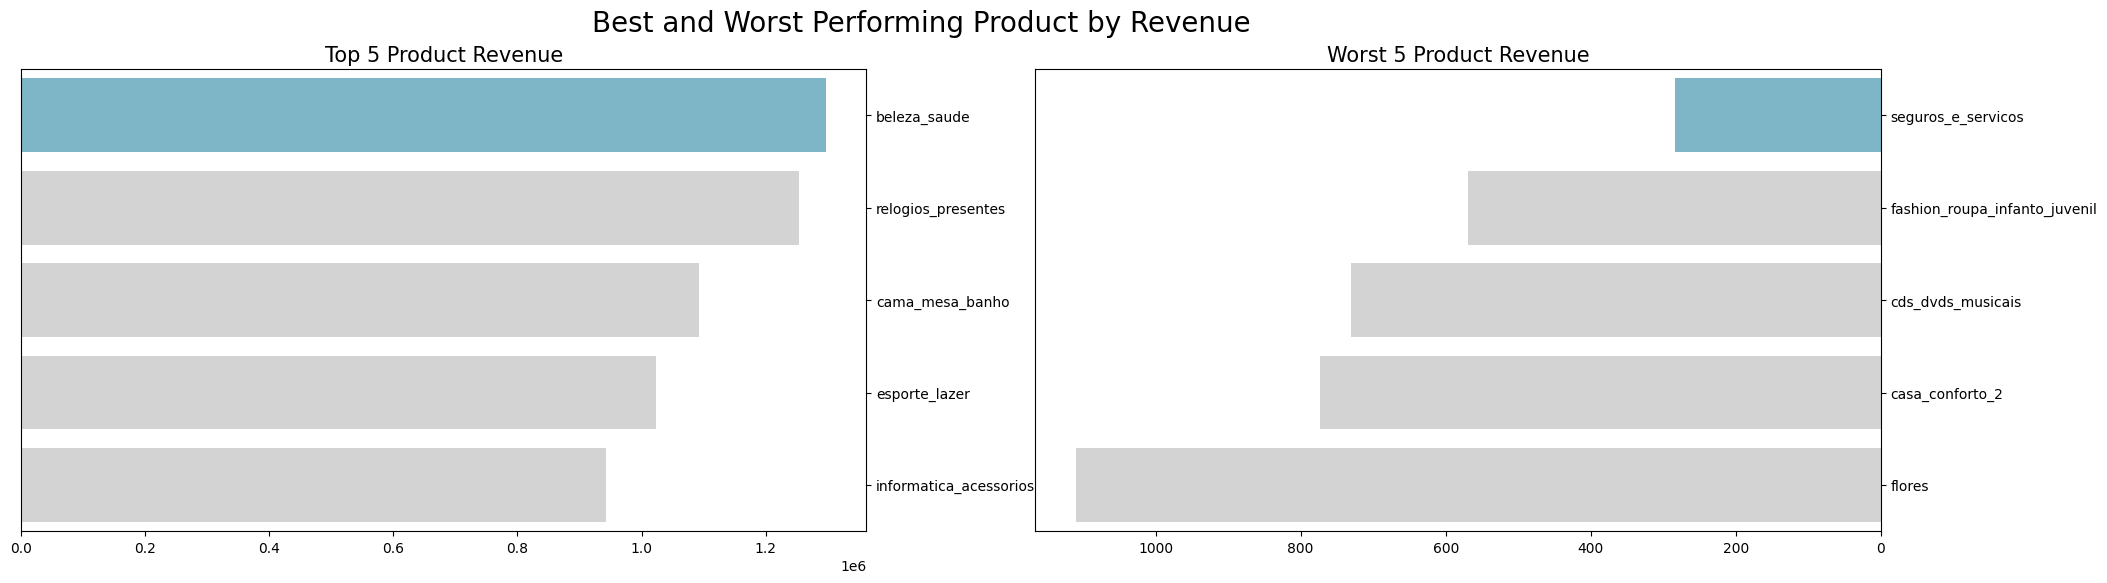

In [108]:
# Produk mana saja yang menyumbang pendapatan paling banyak dan paling sedikit bagi perusahaan?

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

top_products = products_revenue_df.groupby("product_category_name").agg({"price": "sum"}).sort_values(by="price", ascending=False).head(5)
sns.barplot(x=top_products["price"], y=top_products.index, palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].yaxis.set_label_position("right")
ax[0].yaxis.tick_right()
ax[0].set_title("Top 5 Product Revenue", loc="center", fontsize=15)

worst_products = products_revenue_df.groupby("product_category_name").agg({"price": "sum"}).sort_values(by="price", ascending=True).head(5)
sns.barplot(x=worst_products["price"], y=worst_products.index, palette=colors)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst 5 Product Revenue", loc="center", fontsize=15)

plt.suptitle("Best and Worst Performing Product by Revenue", fontsize=20)
plt.show()

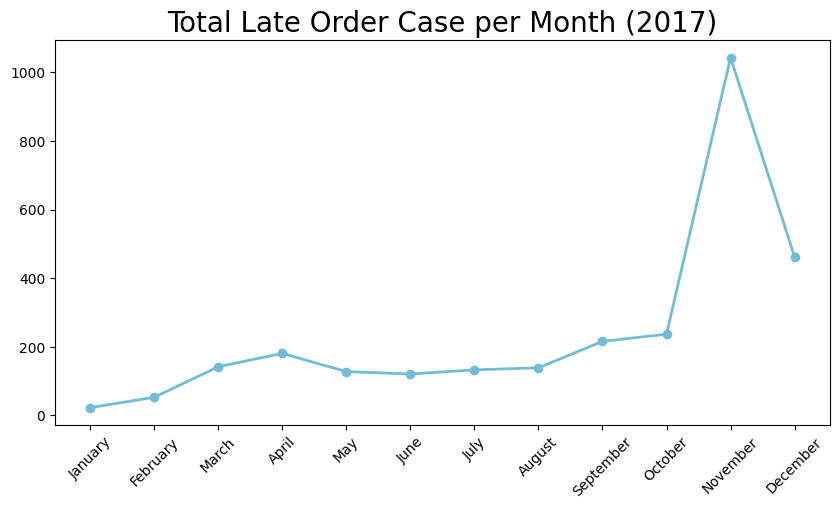

In [109]:
# Bagaimana tren jumlah kasus pengiriman pesanan yang melewati batas estimasi waktu tiap bulan nya pada tahun 2017?
plt.figure(figsize=(10, 5))
plt.plot(
    show_orders_late_df.index,
    show_orders_late_df["count"],
    marker='o',
    linewidth=2,
    color="#72BCD4"
)
plt.title("Total Late Order Case per Month (2017)", loc="center", fontsize=20)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.show()

### Pertanyaan 1:

Produk mana saja yang menyumbang pendapatan paling banyak dan paling sedikit bagi perusahaan?

### Pertanyaan 2:

Bagaimana tren jumlah kasus pengiriman pesanan yang melewati batas estimasi waktu tiap bulan nya pada tahun 2017?

## Conclusion

- Kategori produk **beleza_saude** memiliki peran vital dalam menyumbang pendapatan paling banyak bagi perusahaan yang memiliki total pendapatan sebesar **1297490.77** diikuti oleh **relogios_presentes**, **cama_mesa_banho**, dst. Sedangkan yang paling sedikit yaitu kategori produk **seguros_e_servicos** yang hanya memiliki total pendapatan sebesar **283.29**
- Tren kasus keterlambatan pengiriman barang diatas waktu estimasi pada tahun 2017 cenderung mengalami kenaikan dan penurunan pada awal bulan, akan mengalami **kenaikan drastis** pada bulan **November**, dan **penurunan drastis** pada bulan **Desember**.